# Prática 2

***Aprendizado Dinâmico***

por **Cibele Russo** (ICMC/USP - São Carlos SP)

**MBA em Ciências de Dados**

Considere os dados de fechamento do papel VALE3 a partir de 21/07/2020 no arquivo VALE3.csv.
(fonte dos dados https://br.financas.yahoo.com/quote/VALE3.SA/history?p=VALE3.SA em Acesso em 20/07/2021)


Nesta prática, aplicaremos os conhecimentos adquiridos na Aula 2 a esses dados, a saber:

- Método de Holt

- Método de Holt-Winters

- Previsão 

- Estacionariedade


Carregue as bibliotecas

In [1]:
# Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")


**1. Faça a leitura dos dados a partir do arquivo VALE3.csv disponível no material do curso. Para essa análise, utilizaremos a variável que indica os fechamentos, Close. Quantas observações tem a série original? Visualize a série Close.**

In [2]:
# VALE3 - Leitura dos dados
VALE3 = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/VALE3.csv', index_col='Date', parse_dates=True)

VALE3.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-21,60.439999,60.480000,59.270000,59.700001,53.772350,29043600.0
2020-07-22,59.930000,60.250000,58.799999,59.240002,53.358028,19644700.0
2020-07-23,59.900002,60.160000,58.639999,58.849998,53.006744,17291900.0
2020-07-24,58.570000,58.849998,57.820000,58.599998,52.781574,22544100.0
2020-07-27,59.099998,61.630001,58.980000,61.369999,55.276535,35124800.0


In [3]:
len(VALE3)

246

<AxesSubplot:xlabel='Date'>

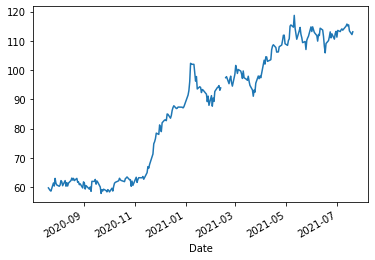

In [4]:
VALE3['Close'].plot()

**2. Quais as datas mínima e máxima de observação da série Close? Repita o procedimento feito em aula para preencher os dados faltantes com a função VALE3.fillna(method='ffill', inplace=True). Nesse caso, a frequência usada em pd.date_range deve ser 'B' pois a bolsa de valores não funciona aos fins de semana. O que faz o método ffill de fillna?**

In [5]:
VALE3.index.min()

Timestamp('2020-07-21 00:00:00')

In [6]:
VALE3.index.max()

Timestamp('2021-07-20 00:00:00')

In [7]:
idx = pd.date_range(start=VALE3.index.min(), end=VALE3.index.max(), freq='B')
idx

DatetimeIndex(['2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24',
               '2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30',
               '2020-07-31', '2020-08-03',
               ...
               '2021-07-07', '2021-07-08', '2021-07-09', '2021-07-12',
               '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16',
               '2021-07-19', '2021-07-20'],
              dtype='datetime64[ns]', length=261, freq='B')

In [8]:
VALE3 = VALE3.reindex(idx)
VALE3.head()

,Open,High,Low,Close,Adj Close,Volume
2020-07-21,60.439999,60.480000,59.270000,59.700001,53.772350,29043600.0
2020-07-22,59.930000,60.250000,58.799999,59.240002,53.358028,19644700.0
2020-07-23,59.900002,60.160000,58.639999,58.849998,53.006744,17291900.0
2020-07-24,58.570000,58.849998,57.820000,58.599998,52.781574,22544100.0
2020-07-27,59.099998,61.630001,58.980000,61.369999,55.276535,35124800.0


In [9]:
VALE3.fillna(method='ffill', inplace=True)

**3. Qual o novo número de observações da série Close após o procedimento em 2.?**

In [10]:
len(VALE3)

261

**4. Vamos aplicar os métodos de Holt e Holt-Winters para esses dados. Faça a leitura das bibliotecas necessárias e crie a série Holt na base de dados. Atribua a ela os valores ajustados pelo Método de Holt. Lembre-se que a série fica deslocada e corrija com a função shift(-1).**

In [11]:
# Método de Holt 

from statsmodels.tsa.holtwinters import ExponentialSmoothing

modelo =  ExponentialSmoothing(VALE3['Close'], trend='add');

ajustadoH = modelo.fit();

VALE3['Holt'] = ajustadoH.fittedvalues.shift(-1);

VALE3.head()


,Open,High,Low,Close,Adj Close,Volume,Holt
2020-07-21,60.439999,60.480000,59.270000,59.700001,53.772350,29043600.0,59.896910
2020-07-22,59.930000,60.250000,58.799999,59.240002,53.358028,19644700.0,59.516445
2020-07-23,59.900002,60.160000,58.639999,58.849998,53.006744,17291900.0,59.127472
2020-07-24,58.570000,58.849998,57.820000,58.599998,52.781574,22544100.0,58.862455
2020-07-27,59.099998,61.630001,58.980000,61.369999,55.276535,35124800.0,61.304499


**5. Visualize as séries Close e Holt. O método apresenta um bom ajuste?**

<AxesSubplot:>

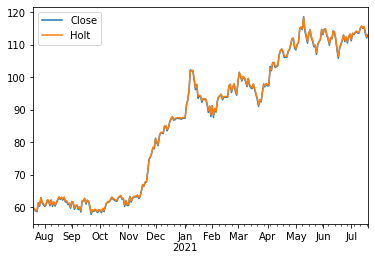

In [12]:
VALE3[['Close','Holt']].plot()

**6. Faz sentido ajustar o método de Holt-Winters? Qual seria o período da sazonalidade? 5 dias pode fazer sentido? Aplique os métodos de Holt-Winters com sazonalidade aditiva e multiplicativa e visualize os resultados.**

In [13]:
# Ajuste do modelo pelo Método de Holt-Winters com sazonalidade aditiva

modelo =  ExponentialSmoothing(VALE3['Close'],trend='add',seasonal='add',seasonal_periods=5);

ajustadoHW = modelo.fit();

VALE3['Holt-Winters-adit-5'] = ajustadoHW.fittedvalues;

VALE3.head()

,Open,High,Low,Close,Adj Close,Volume,Holt,Holt-Winters-adit-5
2020-07-21,60.439999,60.480000,59.270000,59.700001,53.772350,29043600.0,59.896910,59.616471
2020-07-22,59.930000,60.250000,58.799999,59.240002,53.358028,19644700.0,59.516445,59.977255
2020-07-23,59.900002,60.160000,58.639999,58.849998,53.006744,17291900.0,59.127472,59.401942
2020-07-24,58.570000,58.849998,57.820000,58.599998,52.781574,22544100.0,58.862455,59.001572
2020-07-27,59.099998,61.630001,58.980000,61.369999,55.276535,35124800.0,61.304499,59.119887


<AxesSubplot:>

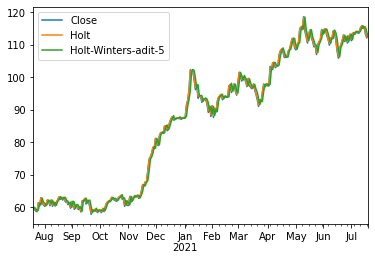

In [14]:
VALE3[['Close','Holt','Holt-Winters-adit-5']].plot()

In [15]:
# Ajuste do modelo pelo Método de Holt-Winters com sazonalidade aditiva

modelo =  ExponentialSmoothing(VALE3['Close'],trend='add',seasonal='mul',seasonal_periods=5);

ajustadoHW = modelo.fit();

VALE3['Holt-Winters-mul-5'] = ajustadoHW.fittedvalues;

VALE3.head()

,Open,High,Low,Close,Adj Close,Volume,Holt,Holt-Winters-adit-5,Holt-Winters-mul-5
2020-07-21,60.439999,60.480000,59.270000,59.700001,53.772350,29043600.0,59.896910,59.616471,59.620284
2020-07-22,59.930000,60.250000,58.799999,59.240002,53.358028,19644700.0,59.516445,59.977255,59.947728
2020-07-23,59.900002,60.160000,58.639999,58.849998,53.006744,17291900.0,59.127472,59.401942,59.454850
2020-07-24,58.570000,58.849998,57.820000,58.599998,52.781574,22544100.0,58.862455,59.001572,59.028065
2020-07-27,59.099998,61.630001,58.980000,61.369999,55.276535,35124800.0,61.304499,59.119887,59.028437


<AxesSubplot:>

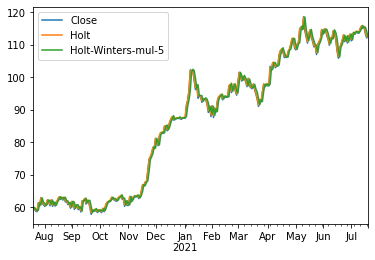

In [16]:
VALE3[['Close','Holt','Holt-Winters-mul-5']].plot()

**7. Olhe as previsões para as últimas 40 observações**

<AxesSubplot:>

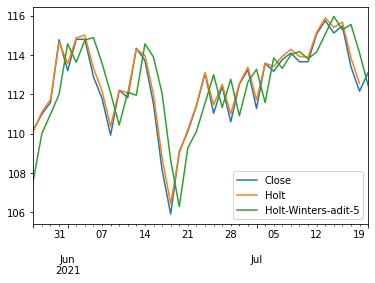

In [17]:
VALE3[['Close','Holt','Holt-Winters-adit-5']][-40:].plot()

**8. Como ficam as previsões? Use 240 observações para treino e 21 para teste.**

In [18]:
len(VALE3)-21

240

In [19]:
dados_treino = VALE3.iloc[:240] # Dados de treinamento até observação 210, sem incluí-la
dados_teste = VALE3.iloc[240:] # Dados de teste a partir da observação 210

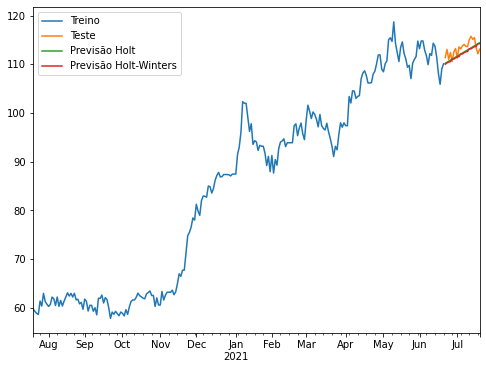

In [20]:
ajustado_H = ExponentialSmoothing(dados_treino['Close'],trend='add').fit()
ajustado_HW = ExponentialSmoothing(dados_treino['Close'],trend='add',seasonal='add',seasonal_periods=5).fit()

predito_H = ajustado_H.forecast(21).rename('Previsão Holt')
predito_HW = ajustado_HW.forecast(21).rename('Previsão Holt')

predito_H.index = VALE3.index[240:]
predito_HW.index = VALE3.index[240:]

dados_treino['Close'].plot(legend=True,label='Treino')
dados_teste['Close'].plot(legend=True,label='Teste',figsize=(8,6))
predito_H.plot(legend=True,label='Previsão Holt');
predito_HW.plot(legend=True,label='Previsão Holt-Winters');



**9. É possível melhorar as previsões com o método de Holt-Winters com sazonalidade e/ou tendência multiplicativos?**

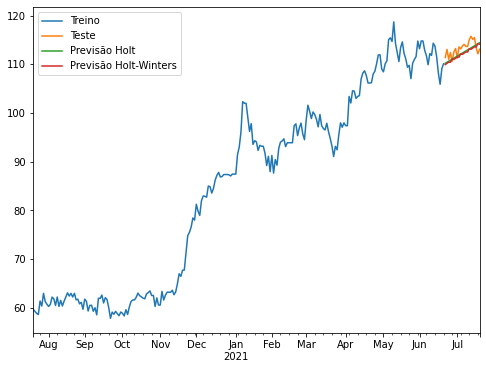

In [21]:
ajustado_H = ExponentialSmoothing(dados_treino['Close'],trend='add').fit()
ajustado_HW = ExponentialSmoothing(dados_treino['Close'],trend='add',seasonal='mul',seasonal_periods=5).fit()

predito_H = ajustado_H.forecast(21).rename('Previsão Holt')
predito_HW = ajustado_HW.forecast(21).rename('Previsão Holt')

predito_H.index = VALE3.index[240:]
predito_HW.index = VALE3.index[240:]

dados_treino['Close'].plot(legend=True,label='Treino')
dados_teste['Close'].plot(legend=True,label='Teste',figsize=(8,6))
predito_H.plot(legend=True,label='Previsão Holt');
predito_HW.plot(legend=True,label='Previsão Holt-Winters');




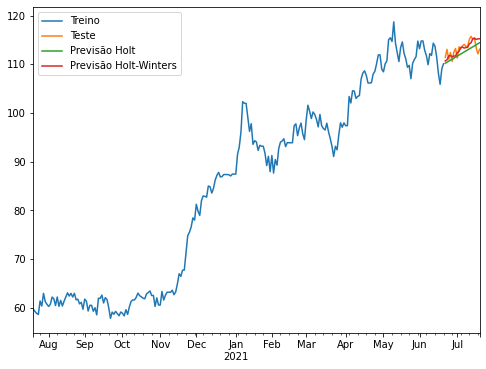

In [22]:

ajustado_H = ExponentialSmoothing(dados_treino['Close'],trend='add').fit()
ajustado_HW = ExponentialSmoothing(dados_treino['Close'],trend='mul',seasonal='mul',seasonal_periods=7).fit()

predito_H = ajustado_H.forecast(21).rename('Previsão Holt')
predito_HW = ajustado_HW.forecast(21).rename('Previsão Holt')

predito_H.index = VALE3.index[240:]
predito_HW.index = VALE3.index[240:]

dados_treino['Close'].plot(legend=True,label='Treino')
dados_teste['Close'].plot(legend=True,label='Teste',figsize=(8,6))
predito_H.plot(legend=True,label='Previsão Holt');
predito_HW.plot(legend=True,label='Previsão Holt-Winters');



**10. Utilize os métodos de Holt e Holt-Winters e compare os erros quadráticos médios e erros absolutos médios. (Depois você pode repetir para os dados de COVID-19).**

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [24]:
mean_squared_error(dados_teste['Close'],predito_HW)

1.5511182121109255

In [25]:
mean_absolute_error(dados_teste['Close'], predito_HW)

0.9834881232536477

In [26]:
mean_squared_error(dados_teste['Close'],predito_H)

2.220268243195281

In [27]:
mean_absolute_error(dados_teste['Close'], predito_H)

1.3575653942441903

**11. Crie séries da média móvel simples e desvio padrão móvel com janelas de 5 dias. A série parece estacionária?**

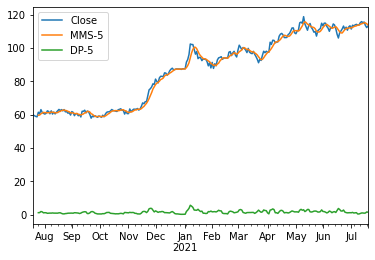

In [28]:
# Verificando as séries de média e desvio-padrão móvel com janela de 7 dias

VALE3['MMS-5'] = VALE3['Close'].rolling(window=5).mean()
VALE3['DP-5'] = VALE3['Close'].rolling(window=5).std()

VALE3[['Close','MMS-5','DP-5']].plot();

A série não parece estacionária.

**12. A série das primeiras diferenças parece estacionária?.**

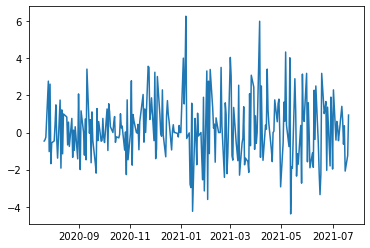

In [29]:
# Primeiras diferenças
y = np.diff(VALE3['Close'])
x = VALE3.iloc[1:].index

plt.plot(x,y);

**13. Considere boxplots semanais para a série original. Ela parece estacionária?**

<AxesSubplot:xlabel='Mês de observação', ylabel='Close'>

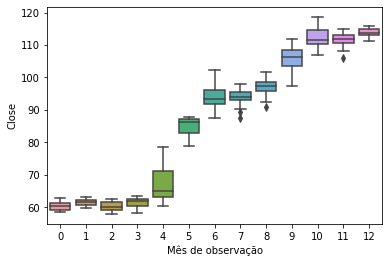

In [30]:
import seaborn as sns


VALE3['Mês de observação'] = (VALE3.index.month + (VALE3.index.year - VALE3.index.min().year)*12) - VALE3.index.min().month 

sns.boxplot(x=VALE3['Mês de observação'], y=VALE3['Close'])

**14. Utilize o Teste de Dickey-Fuller aumentado. Que evidências ele dá sobre a estacionariedade da série e da primeira diferença?**

In [31]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(VALE3['Close'], autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.758537
p-value: 0.830999
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


In [32]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(np.diff(VALE3['Close']), autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.876273
p-value: 0.000039
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
